---
title: "Principal Component Analysis"
author: Daniel Redel
date: today
format:
  html:
    toc: true
    code-fold: false
    html-math-method: katex
jupyter: python3
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

When faced with a large set of correlated variables, principal components allow us to summarize this set with a **smaller number of representative variables** that collectively explain most of the variability in the original set.

> PCA finds a low-dimensional representation of a data set that contains as much as possible of the variation. 

The idea is that each of the $n$ observations lives in $p$-dimensional space, but not all of these dimensions are equally interesting. PCA seeks a small number of dimensions that are as interesting as possible, where the concept of interesting is measured by the amount that the observations vary along each dimension. Each of the dimensions found by PCA is a linear combination of the $p$ features.

PCA is an **unsupervised approach**, since it involves only a set of features $X_1,X_2,...,X_p$, and no associated response $Y$. Apart from producing derived variables for use in supervised learning problems, **PCA also serves as a tool for data visualization**.

# Data Pre-Processing

In [2]:
#| label: tbl-raw-dataset1
#| tbl-cap: Breast Cancer Dataset
#| code-fold: true
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Add target
df['target'] = cancer.target

df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Before we apply PCA, we scale our data so that each feature has unit variance using `StandardScaler`.

In [3]:
from sklearn.preprocessing import StandardScaler

# Covariates Only
X = df.drop(columns=['target'])
y = df['target']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
X.shape

(569, 30)

# Principal Component Analysis

Having scaled the data, we can then perform principal components analysis using the `PCA()` transform from the `sklearn.decomposition package`:

In [4]:
from sklearn.decomposition import PCA

# PCA
pca = PCA() 
projected = pca.fit_transform(X)
print('Number of PCA:', projected.shape)

Number of PCA: (569, 30)


We observe $30$ distinct principal components, which is be expected because there are in general $\min(n−1,p)$ informative principal components in a data set with $n$ observations and $p$ variables.

The principal components themselves are stored in the `components_` attribute of the PCA object during fitting:

In [5]:
#| code-fold: true

pca_components_df = pd.DataFrame(pca.components_, columns=X.columns)
pca_components_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.005086,0.002197,0.035076,0.516826,0.000004,0.000041,0.000082,0.000048,0.000007,-0.000003,...,0.007155,0.003067,0.049458,0.852063,0.000006,0.000101,0.000169,0.000074,0.000018,0.000002
1,0.009287,-0.002882,0.062748,0.851824,-0.000015,-0.000003,0.000075,0.000046,-0.000025,-0.000016,...,-0.000569,-0.013215,-0.000186,-0.519742,-0.000077,-0.000256,-0.000175,-0.000031,-0.000157,-0.000055
2,-0.012343,-0.006355,-0.071669,-0.027894,0.000073,0.000102,0.000266,0.000036,0.000141,0.000051,...,-0.015566,-0.031545,-0.092313,-0.039319,-0.000042,-0.000765,-0.000847,-0.000334,-0.000350,-0.000041
3,-0.034238,-0.362415,-0.329281,0.039412,-0.000344,-0.003005,-0.003408,-0.001247,-0.000967,-0.000199,...,-0.061900,-0.542057,-0.666816,0.038769,-0.000722,-0.010362,-0.011562,-0.002995,-0.002641,-0.000909
4,0.035456,-0.443187,0.313383,-0.046038,0.000579,0.002526,0.002195,0.001132,0.000937,0.000207,...,0.053145,-0.612574,0.564103,-0.018453,0.000465,0.006096,0.006165,0.002412,0.001883,0.000520


- Each row in `components_` corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.), 
- Each column corresponds to a feature in your original data with their corresponding **loading vectors**. 
- The **entries** in each row (principal component) indicate the **weight** or contribution of each original feature to that particular principal component (**loadings**).

## Loading Vector Visualization

The **loadings** tells us how each variable contributes to each Principal Component:

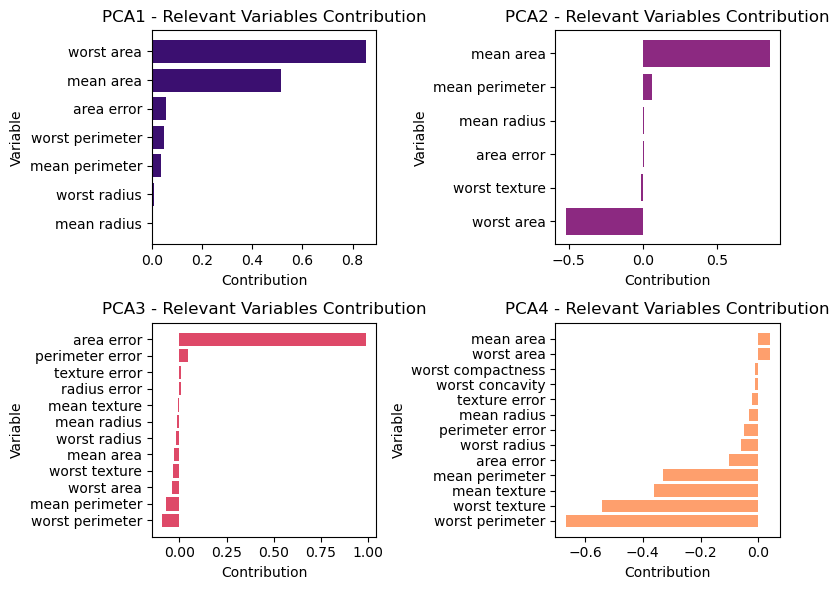

In [37]:
#| label: fig-loadings1
#| fig-cap: PCA Loadings
#| code-fold: true

import matplotlib.pyplot as plt
import seaborn as sns

# Set threshold for filtering features close to zero
threshold = 0.005  # Adjust this threshold as needed

# Create a DataFrame for PCA components
pca_components_df = pd.DataFrame(pca.components_, columns=X.columns)

# Create subplots for each principal component
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Define magma color palette
colors = sns.color_palette("magma", n_colors=4)

# Loop through each principal component
for i in range(4):
    # Calculate the row and column index for the subplot
    row_index = i // 2
    col_index = i % 2
    
    # Get the principal component i and sort it in ascending order
    pca_component_i = pca_components_df.iloc[i]
    
    # Filter out features close to zero
    relevant_features = pca_component_i[abs(pca_component_i) >= threshold].sort_values()
    
    # Plot the contribution of relevant variables for principal component i
    axs[row_index, col_index].barh(relevant_features.index, relevant_features.values, color=colors[i])
    axs[row_index, col_index].set_title(f'PCA{i+1} - Relevant Variables Contribution')
    axs[row_index, col_index].set_xlabel('Contribution')
    axs[row_index, col_index].set_ylabel('Variable')

plt.tight_layout()
plt.show()


We can also visualize the coefficients using a heat map, which might be easy to understand:

Text(0, 0.5, '')

<Figure size 500x300 with 0 Axes>

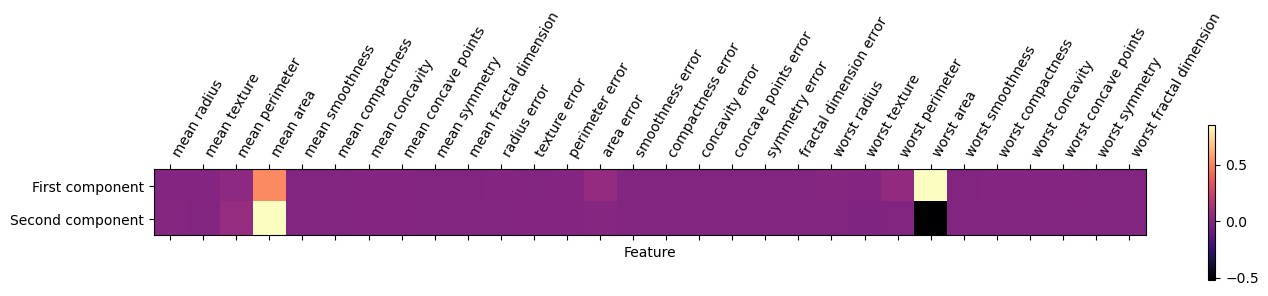

In [42]:
#| label: fig-loadings-heatmap
#| fig-cap: Heatmap of PCA Loadings
#| code-fold: true

# Create a DataFrame for PCA components
pca_components_df = pd.DataFrame(pca.components_, columns=X.columns)

# Figure
plt.figure(figsize=(5, 3))  # Adjust the size as needed
plt.matshow(pca_components_df.loc[0:1,], cmap='magma')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(pca_components_df.columns)), pca_components_df.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("")

## Biplot Visualization

A Biplot presents the first two PCA’s of the data. Think of these as two juxtaposed graphs: axes **scores** and axes of **loadings**. We can plot the first two PCAs as follows:

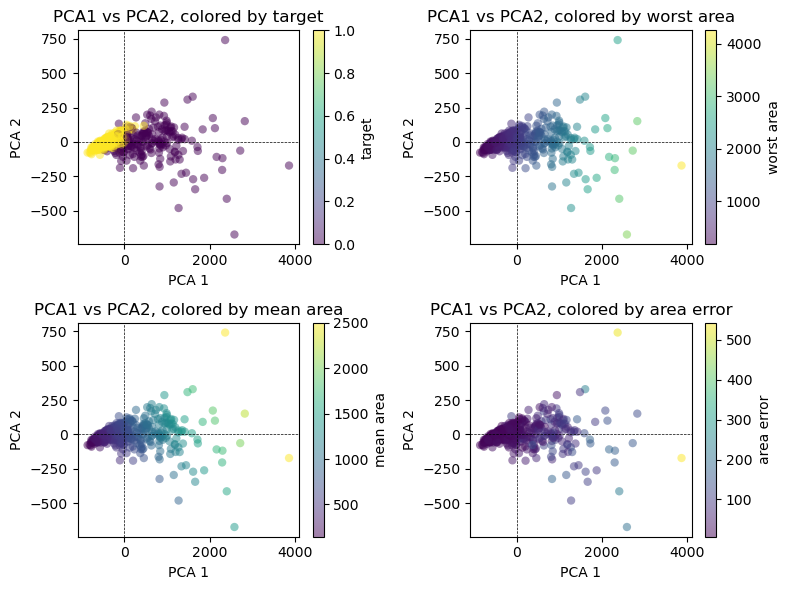

In [45]:
#| label: fig-pca1
#| fig-cap: PCA1 vs PCA2
#| code-fold: true

import matplotlib.pyplot as plt

# Project data onto the first two principal components
projected_data = pca.transform(X)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# List of variables to color by
variables = ['target', 'worst area', 'mean area', 'area error']

# Loop through each subplot and plot PCA1 vs PCA2 with different colorings
for i, var in enumerate(variables):
    # Scatter plot of PCA1 vs PCA2
    scatter = axs[i // 2, i % 2].scatter(projected_data[:, 0], projected_data[:, 1],
                                         c=df[var], edgecolor='none', alpha=0.5)
    
    # Customize the colorbar
    plt.colorbar(scatter, ax=axs[i // 2, i % 2], label=var)
    
    # Add dotted lines at y=0 and x=0
    axs[i // 2, i % 2].axhline(0, color='k', linestyle='--', linewidth=0.5)
    axs[i // 2, i % 2].axvline(0, color='k', linestyle='--', linewidth=0.5)
    
    # Set labels and title
    axs[i // 2, i % 2].set_xlabel('PCA 1')
    axs[i // 2, i % 2].set_ylabel('PCA 2')
    axs[i // 2, i % 2].set_title(f'PCA1 vs PCA2, colored by {var}')

plt.tight_layout()
plt.show()



It is important to note that PCA is an unsupervised method, and does not use any class information when finding the rotation. It simply looks at the correlations in the data. For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points. You can see that the two classes separate quite well in this two-dimensional space.

## Variance Explained

How much of the variance in the data is not contained in the first few principal components?

First, we can compute the Variance Explained by each principal component from the standard deviation returned by:

$$
\frac{\text{Var}(Z_m)}{\sum^{\pink p}_{j=1}\text{Var}(X_j)} = \frac{\frac{1}{n}\sum^n_{i=1} \left(\sum^{\pink p}_{j=1}\phi_{jm}x_{ij} \right)^2}{\blue{ \sum^p_{j=1}\frac{1}{n}\sum^n_{i=1}x_{ij}^2}}
$$

Using the Screeplot: We typically decide on the number of principal components required to visualize the data by examining a scree plot.

- **Elbow Criteria**: We choose the smallest number of principal components that are required in order to *explain a sizable amount of the variation in the data*.
- This is done by eyeballing the scree plot, and looking for a ***point at which the proportion of variance explained by each subsequent principal component drops off.***

### Proportion of variance explained (PVE): Screeplot

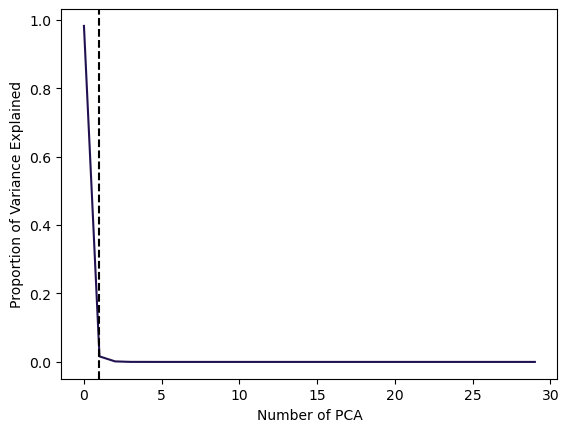

In [35]:
#| label: fig-pve
#| fig-cap: Proportion of Variance Explained (PVE)
#| code-fold: true

# Plot scree plot
plt.plot(pca.explained_variance_ratio_, color=sns.color_palette("magma")[0])
plt.xlabel('Number of PCA')
plt.ylabel('Proportion of Variance Explained')

# Find the elbow point (point of inflection)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
elbow_point = np.argmax(np.diff(cumulative_variance) < 0.005)  # Adjust the threshold as needed

# Add vertical line for the elbow point
plt.axvline(x=elbow_point, color='k', linestyle='--')

plt.show()

In this example, using 1 PCAs already is able to explain 99% of the total Variance.

### Cumulative Proportion of Variance Explained:

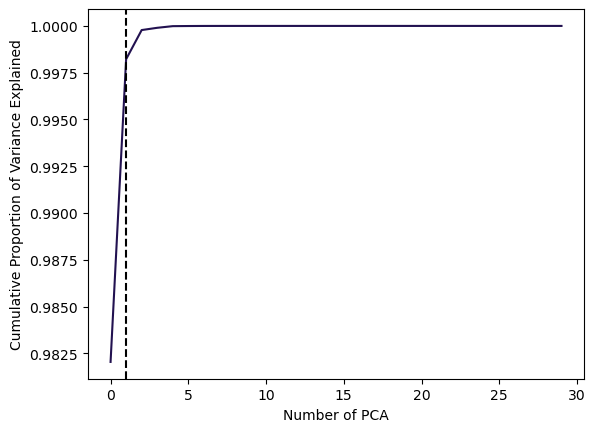

In [36]:
#| label: fig-cumpve
#| fig-cap: Cuumulative Proportion of Variance Explained (Cum PVE)
#| code-fold: true

# Plot cumulative PVE
plt.plot(np.cumsum(pca.explained_variance_ratio_), color=sns.color_palette("magma")[0])
plt.xlabel('Number of PCA')
plt.ylabel('Cumulative Proportion of Variance Explained')

# Find the elbow point (point of inflection)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
elbow_point = np.argmax(np.diff(cumulative_variance) < 0.005)  # Adjust the threshold as needed

# Add vertical line for the elbow point
plt.axvline(x=elbow_point, color='k', linestyle='--')

plt.show()